__author__ = "Elias El Otmani"
__credits__ = "Thomas Fontaine"
__email__ = "elias.el.otmani@ens.psl.eu"

Description : Analysis of the model's supopulation response functions

In [1]:
import numpy as np 
import torch 
import matplotlib.pyplot as plt 
from numpy import nan 

In [2]:
a_ = 1.9
b_ = 7.

def f1(x, b = 0, a = 0, a_ = 1.9, b_ = 7.):	# Excitatory, Subtractive, Divisive. 
	#return .5 * ( 1. + torch.tanh( torch.as_tensor([.5 * ( (a_ / (1. + a)) * (x - b - b_) )]) ).item() ) - ( 1./(1. + torch.exp( torch.as_tensor([a_*b_/(1.+a)]) ).item() ) )
	return 1/(1 + np.exp( - (a_ / (1. + a)) * (x - b - b_)  )) - ( 1./(1. + np.exp( np.array([a_*b_/(1.+a)]) ) ) )

def f2(x, b = 0, a = 0, a_ = 1.9, b_ = 7.):
    return (a_/(a_+ a))*(1/(1 + np.exp( - (a_ * (x - b - b_)))) - 1 / (1 + np.exp(a_*b_)))

def f3(x, b, a, a_ = 1.9, b_ = 7.):
    return 1/(1 + np.exp( - (a_ * (x/(1+a) - b - b_)  ))) - ( 1./(1. + np.exp(a_*b_/(1.+a) ) ) )
    
def k1(a, a_ = 1.9, b_ = 7.):
    return torch.exp(torch.as_tensor([a_*b_/(1.+a)])).item() / (1. + torch.exp(torch.as_tensor([a_*b_/(1.+a)])).item())

def k2(A2):
    return (np.exp(a_*b_)/(1 + np.exp(a_*b_)))*(a_/(a_ + A2))

def model(x, b = 0, a = 0):
	A = 1/0.008
	return -x + (A*K(a) - x)*f(x, b, a)

def model2(x, b = 0, a = 0):
	A = 1/0.008
	return -x + (A*K(a) - x)*f2(x, b, a)

def equiv(A1):
    return a_*(((1+np.exp(a_*b_/(1+A1)))*(1+np.exp(a_*b_))/np.exp(a_*b_*(A1+2)/(1+A1)))-1 )

x = np.linspace(0, 30, 100)

q1 = 0.8*.101*35
q2 = equiv(q1)

In [3]:
'''
for elem in x : 
	fr1.append(f(elem))
	fr2.append(f(elem, (1-q)*5, q*5))
	fr3.append(f(elem, 5)) # Adding subtractive inhibition 
	fr4.append(f(elem, (1-q)*5 + 5, q*5))
	fr5.append(f2(elem))		
	fr6.append(f2(elem, (1-q2)*5, q2*5)) 	
	fr7.append(f2(elem, 5)) 		
	fr8.append(f2(elem, (1-q2)*5 + 5, q2*5))
'''

inh = 3
q1 = 0.8
q2 = 0.1

fr1 = []
fr2 = []
fr3 = []
fr4 = []
fr42 = []
fr5 = []
fr6 = []
fr7 = []
fr8 = []

for elem in x : 
	fr1.append(f1(elem))                       # Original divisive inhibition
	fr2.append(f1(elem, inh*(1-q1), inh*q1))    
	fr3.append(f1(elem))                       # Original with lower q
	fr4.append(f1(elem, inh*(0.5), inh*0.5))
	#fr42.append(f2(elem, q1))
	fr5.append(f1(elem))                       # Divisive without plateau 
	fr6.append(f1(elem /(1+inh*0.5), inh*(1-0.5)))
	fr7.append(f2(elem))  
	fr8.append(f2(elem, inh*(0.9), inh*0.1))   # Papasavvas et al 2015

'''
for elem in x : 
	fr1.append(f1(elem))                    # Original divisive inhibition
	fr2.append(f1(elem, 0.25*q1, q1))    
	fr3.append(f2(elem))                    # Papasavvas et al 2020
	fr4.append(f2(elem, 0.6*q1, 0.4*q1))
	fr42.append(f2(elem, q1))
	fr5.append(f1(elem))                    # Divisive without plateau 
	fr6.append(f1(elem/(1+0.1*q1), 0.))
	fr7.append(f3(elem, 0, 0)) 
	fr8.append(f3(elem, 0.*q1, 2*q1))    # Divisive with plateau
'''

'\nfor elem in x : \n\tfr1.append(f1(elem))                    # Original divisive inhibition\n\tfr2.append(f1(elem, 0.25*q1, q1))    \n\tfr3.append(f2(elem))                    # Papasavvas et al 2020\n\tfr4.append(f2(elem, 0.6*q1, 0.4*q1))\n\tfr42.append(f2(elem, q1))\n\tfr5.append(f1(elem))                    # Divisive without plateau \n\tfr6.append(f1(elem/(1+0.1*q1), 0.))\n\tfr7.append(f3(elem, 0, 0)) \n\tfr8.append(f3(elem, 0.*q1, 2*q1))    # Divisive with plateau\n'

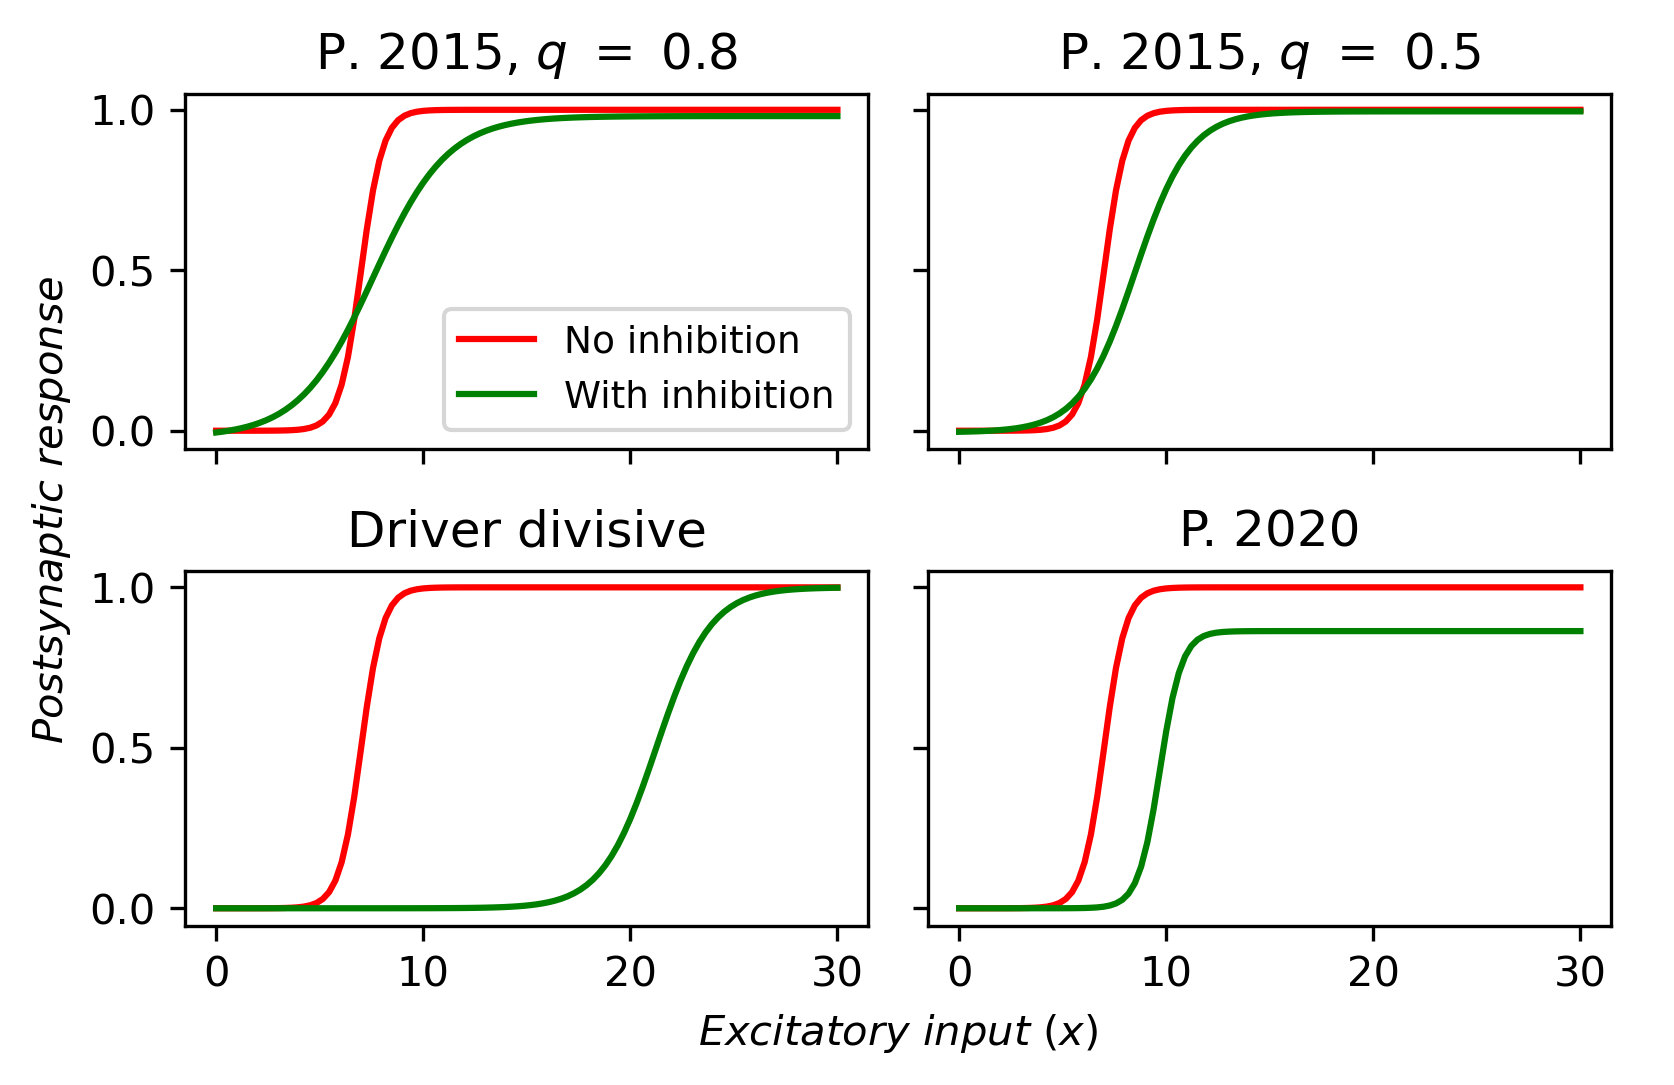

In [7]:
fig, ax = plt.subplots(nrows = 2, ncols = 2, sharey = True, sharex = True, dpi = 300) 

ax[0,0].plot(x, fr1, color = 'red')
ax[0,0].plot(x, fr2, color = 'green')
ax[0,1].plot(x, fr3, color = 'red')
ax[0,1].plot(x, fr4, color = 'green')
#ax[0,1].plot(x, fr42, color = 'black')
ax[1,0].plot(x, fr5, color = 'red')
ax[1,0].plot(x, fr6, color = 'green')
ax[1,1].plot(x, fr7, color = 'red')
ax[1,1].plot(x, fr8, color = 'green')

ax[0,0].set(title = 'P. 2015, $q$ $=$ $0.8$')
ax[0,1].set(title = 'P. 2015, $q$ $=$ $0.5$')
ax[1,0].set(title = 'Driver divisive')
ax[1,1].set(title = 'P. 2020')

#ax[0,0].hlines(y = K(q1), xmin = 0, xmax = 20, linestyle = '--', color = 'grey' ) 
#ax[1,0].hlines(y = np.exp(a_*b_)/(1 + np.exp(a_*b_))*(a_/(a_ + q2*5)), xmin = 0, xmax = 20 ) 
#ax[1,0].hlines(y = k2(q2), xmin = 0, xmax = 20, linestyle = '--', color = 'grey' )
#ax[0,1].hlines(y = k2(0.1*q1), xmin = 0, xmax = 20, linestyle = '--', color = 'grey' )

ax[0,0].legend(('No inhibition', 'With inhibition'), loc = 'lower right', fontsize = 9)

fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)

plt.xlabel('$Excitatory$ $input$ $(x)$')
plt.ylabel('$Postsynaptic$ $response$')

plt.tight_layout()
#plt.set(ylabel = '$Postsynaptic$ $response$', xlabel = '$Excitatory$ $input$')
#ax[1,1].set(xlabel = '$Excitatory$ $input$')

plt.savefig('plots/Fig1/A-f-I_curves.jpg')

### Comparing P 2015 & P 2020 for typical UP-state values of the model

In [8]:
re = 60
rp = 35
rs = 35
Iadp = 1 # SS of Iadp at DOWN state
q = 0.8

driver = 3.9 + .136*re - Iadp 
subtractive = .025*rs + (1-q)*.101*rp
divisive = q*.101*rp

q1 = 0.1
subtractive_2 = .025*rs + (1-q1)*.075*rp
divisive_2 = q1*.075*rp

In [9]:
print(f1(driver, subtractive, divisive))
print(f2(driver, subtractive, divisive))

[0.74375811]
0.3982677990069755


In [10]:
re_low = 1.75
rp_low = 1
rs_low = 1.12
q = 0.8

driver_low = 3.9 + .136*re_low 
subtractive_low = .002*rs_low + (1-q)*.101*rp_low
divisive_low = q*.101*rp_low

In [11]:
print(f1(driver, subtractive, divisive))
print(f2(driver, subtractive, divisive))

[0.74375811]
0.3982677990069755


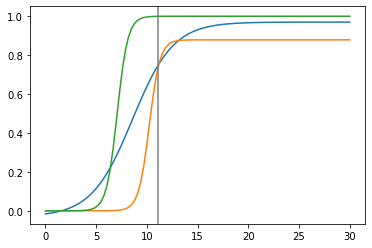

11.06


In [12]:
x = np.linspace(0,30,100)

fi1, fi2, fi3, fi4 = [], [], [], []

for elem in x:
    fi1.append(f1(elem, subtractive, divisive))
    fi2.append(f2(elem, subtractive_2, divisive_2))
    fi3.append(f1(elem, .002*rs))
    #fi4.append(f1(elem, subtractive , divisive +10))
    
plt.plot(x, fi1)
plt.plot(x, fi2)
plt.plot(x, fi3)
#plt.plot(x, fi4)
plt.axvline(x = driver, color = 'gray')
plt.show()

print(driver)

In [13]:
def adp(t, re = 60, Jadp = 0.56, tau_adp = .6):
    return re*Jadp*(1-np.exp(-t/tau_adp))

In [14]:
t = np.linspace(0, 1, 1000)

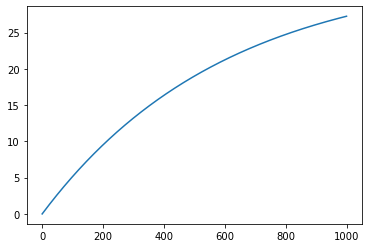

In [15]:
plt.plot(adp(t))

## Derivative of original function

In [16]:
def f1_prime(x, b = 0, a = 0, a_ = 1.9, b_ = 7.):
    return a_/((1 + a)**2)*( b_*np.exp(a_*b_/(1+a))/((1 + np.exp(a_*b_/(1+a)))**2) - (x-b-b_)*np.exp(-a_*(x - b - b_ )/(1+a))/((1 + np.exp(-a_*(x - b - b_)/(1+a)))**2))

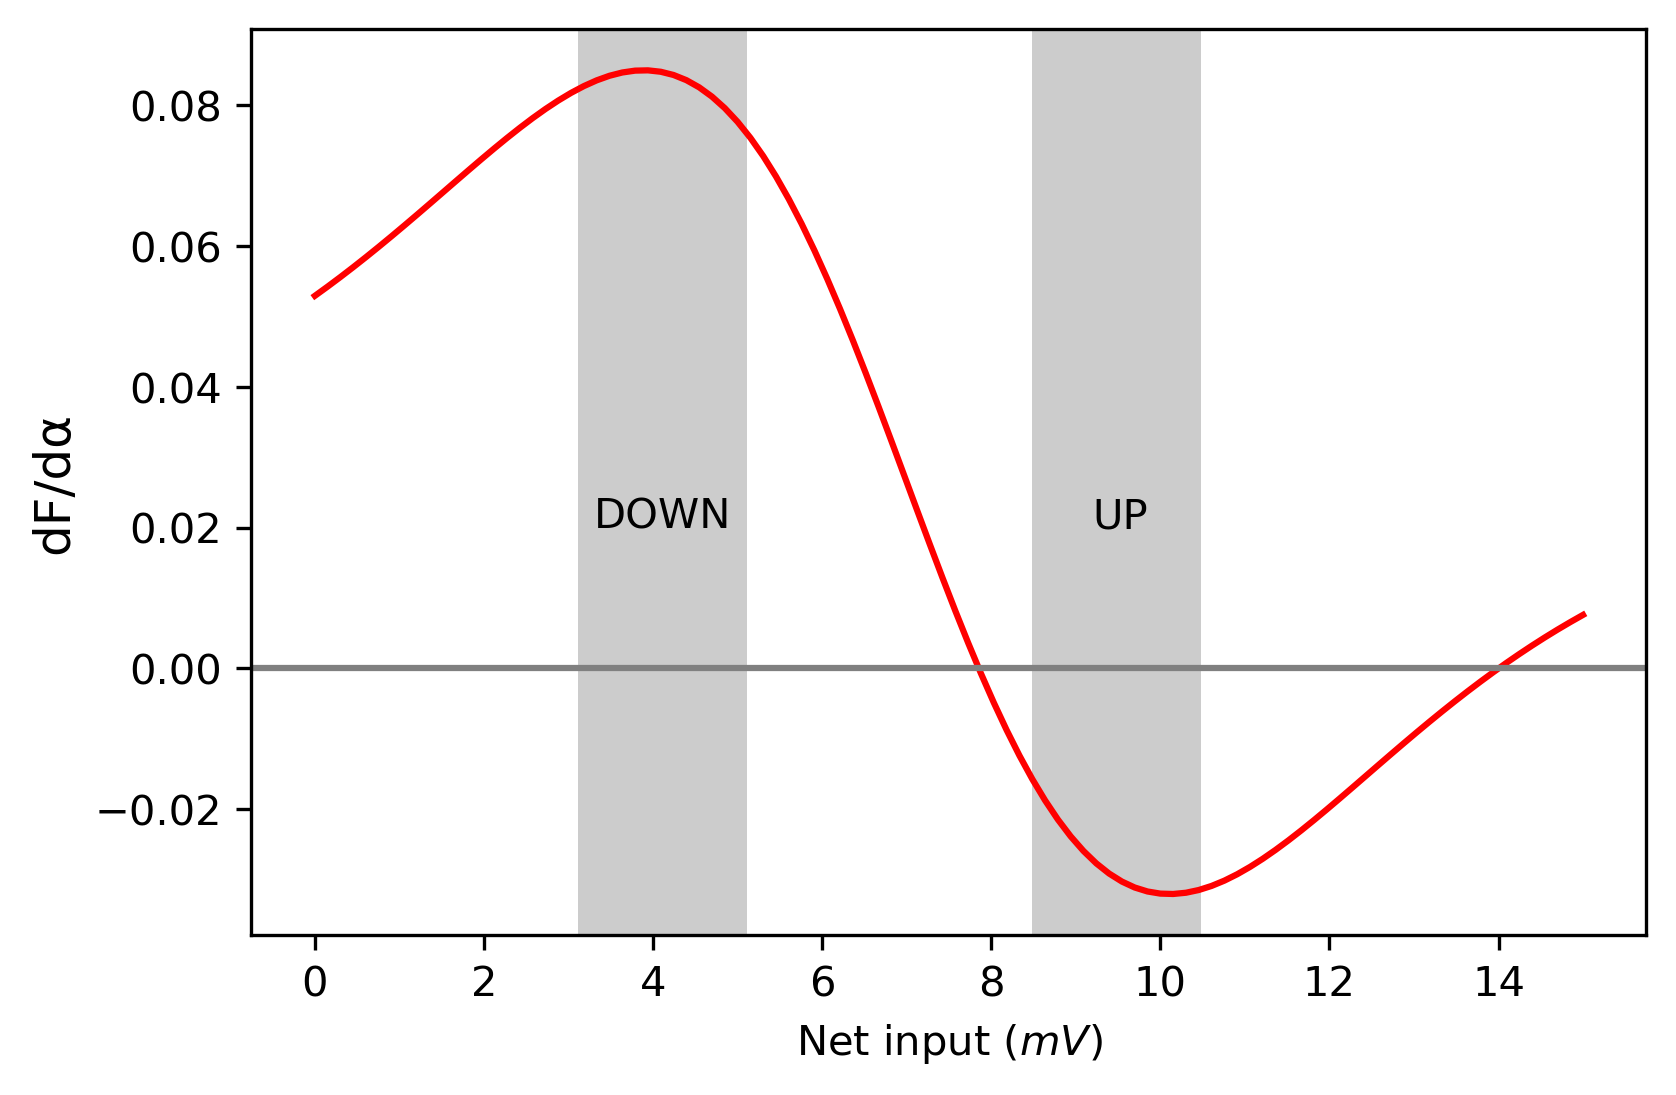

In [22]:
driv = np.linspace(0, 15, 100)
plt.figure(dpi = 300)
plt.plot(driv, f1_prime(driv, 0, divisive), color = 'red')
#plt.plot(driv, f1(driv)/2 - 0.2)
#plt.axvline(driver - subtractive, linestyle = '--', color = 'gray')
#plt.axvline(driver_low - subtractive_low, linestyle = '--', color = 'gray')

plt.axvspan(driver_low - subtractive_low - 1, driver_low - subtractive_low +1, facecolor = 'gray', alpha = 0.4)
plt.axvspan(driver - subtractive - 1, driver - subtractive +1, facecolor = 'gray', alpha = 0.4)
plt.text(3.3, 0.02, 'DOWN')
plt.text(9.2, 0.02, 'UP')
plt.axhline(0, color = 'gray')
plt.xlabel('Net input ($mV$)', fontsize = 10)
plt.ylabel('dF/d\u03B1', fontsize = 12)
plt.savefig('plots/Fig1/B-derivative_original_fi_curve.jpg', dpi = 300)
#plt.plot(driv, f1(driv, 0, subtractive + 1)/2 - 0.2)
#plt.plot(driv, np.gradient(f1(driv)))

In [96]:
one = []
two = []
three = []
y= np.linspace(0,1,100)

for elem in y:
    one.append(k2(equiv(elem)))
    two.append(K(elem))
    three.append(equiv(elem))

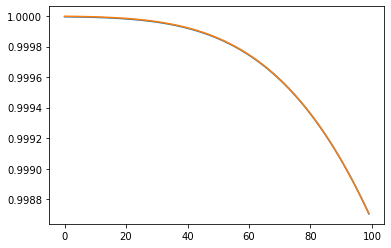

In [74]:
plt.plot(one)
plt.plot(two)

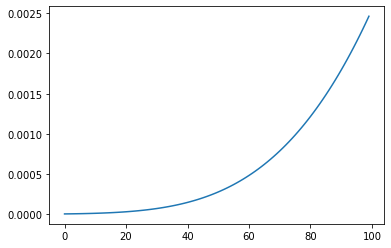

In [97]:
plt.plot(three)

In [34]:
0.8*0.093*35

2.604

In [9]:
theta[0,:9]

tensor([40.6031, 43.6311,  2.1392, 45.4822, 44.7754, 46.4612, 75.7137, 15.4942,
        42.4365], dtype=torch.float64)

In [4]:
#with open('output_data/3.np', 'r') as f: 
#    a = np.load(f)

a = np.load('output_data/3.np')

In [5]:
a

array([[ 1.18160684e+02, -1.24757350e-01,  4.98681075e+02,
         4.98727240e+02,  0.00000000e+00, -1.84116710e-01,
        -3.44678866e+00,  0.00000000e+00,  1.18160684e+02,
         2.59662392e+01,  4.98780967e+02,  4.98727240e+02,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         2.73478215e+01,  5.28791627e+01,  7.46655525e+00,
         6.12933345e+01,  9.50985745e+01,  6.16204168e+01,
         6.44504302e+01,  4.84918443e+00,  3.39573220e+01,
         1.74873143e+01,  9.77518589e+00,  4.48347443e+00,
         9.62298165e+00,  2.99882672e+00,  8.36931120e-01],
       [ 7.49693900e+01,  2.38058542e+01,  4.64377727e+02,
         4.98536722e+02,  0.00000000e+00,  3.62595685e+00,
         1.67521529e+00,  0.00000000e+00,  7.49693900e+01,
         6.65790134e+01,  4.65562223e+02,  4.98536722e+02,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         8.40262754e+01,  3.26889695e+01,  1.46373880e+01,
         8.44089101e+01,  8.11912179e+01,  8.95338709e+